# Stock Value-At-Risk Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2019-01-01' #input
end = '2020-07-01' #input
symbol1 = '^GSPC' #input
symbol2 = 'AMD' #input

In [3]:
market = yf.download(symbol1, start=start, end=end)['Adj Close']
stocks = yf.download(symbol2, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
market_returns = market.pct_change().dropna()
stocks_returns = stocks.pct_change().dropna()

In [5]:
def var(stock_returns, market_returns):
    m = np.matrix([stock_returns, market_returns])
    beta = np.cov(m)[0][1] / np.std(market_returns)
    alpha = np.mean(stock_returns) - beta * np.mean(market_returns)
    sorted_returns = np.sort(stock_returns)
    index = int(alpha * len(sorted_returns))
    VaR = abs(stock_returns[index])
    return VaR

Text(0, 0.5, 'Value-at-Risk')

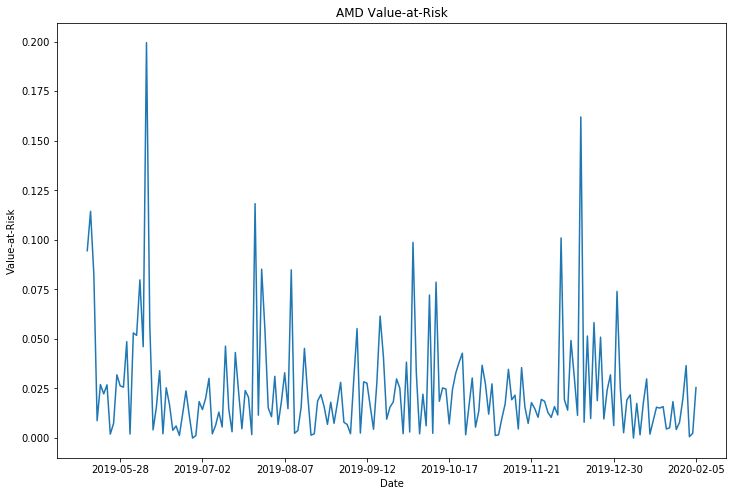

In [6]:
# Compute the running Value-at-Risk
running = [var(stocks_returns[i-90:i], market_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Value-at-Risk up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol2 + ' Value-at-Risk')
plt.xlabel('Date')
plt.ylabel('Value-at-Risk')

In [7]:
stock_var = var(stocks_returns, market_returns)
stock_var

0.11436955133117288

In [8]:
running = [var(stocks_returns[i-90:i], market_returns[i-90:i]) for i in range(90, len(stocks_returns))]
running

[0.09453004215919159,
 0.11436955133117288,
 0.08263156288548523,
 0.008750622646876982,
 0.02698792606951239,
 0.0222882987140276,
 0.026849072583119193,
 0.0019734047668471533,
 0.007414711909266458,
 0.031893996334483865,
 0.0263558271580544,
 0.025679034951292534,
 0.048627838547028346,
 0.002024241281143757,
 0.053030362872128034,
 0.05179855654419541,
 0.07979936049462688,
 0.046085247329617385,
 0.19948052740716316,
 0.05716759142923933,
 0.004096697341041899,
 0.015503919402964916,
 0.03398258281572886,
 0.0021449694640104378,
 0.025365440532338912,
 0.016762203770963602,
 0.003904562063637096,
 0.006097534635492008,
 0.0013146663911793866,
 0.012253775694635927,
 0.0237786927957222,
 0.01140204621131935,
 0.0,
 0.0012526382333953867,
 0.018394671097584192,
 0.014367753093255775,
 0.020234723534012233,
 0.030152811641555255,
 0.0021295206722315996,
 0.0063748242308978575,
 0.013091193494394693,
 0.005562651095346149,
 0.04638298521650597,
 0.014725565638241789,
 0.0031702760446